In [ ]:
from google.colab import files
uploaded = files.upload()

Saving tips.csv to tips.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

tips = pd.read_csv('tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [ ]:
tips.info() #캐글에 있음
#https://www.kaggle.com/tasneemabdulrahim/tips-dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   smoker      244 non-null    object 
 3   day         244 non-null    object 
 4   time        244 non-null    object 
 5   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


In [ ]:
#식당 요일별 빈도 pivot_table 사용

pd.pivot_table(tips,
               index='day',
               columns='size',
               values='total_bill',
               aggfunc='count',
               fill_value=0
               )

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [ ]:
#빈도표
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [ ]:
pc_25 = party_counts.loc[:, 2:5] #정수 인덱스 아님, 컬럼의 이름
pc_25

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [ ]:
pc_25.sum(1)

day
Fri     18
Sat     85
Sun     75
Thur    58
dtype: int64

In [ ]:
#각 열방향 합계1로 정규화
pc_25.apply(lambda x: x/pc_25.sum(1))

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


In [ ]:
pc_25.div(pc_25.sum(1), axis=0)

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


팁이 10이고 총 청구 금액이 100인 경우, 팁의 퍼센트를 마크업과 마진으로 계산한 결과는 다음과 같습니다:

마크업 (Markup): 약 11.11%
- 마크업은 기본 비용에 대한 추가 비용(여기서는 팁)의 비율
- Tip / (Total Bill - Tip) x 100

마진 (Margin): 10%
- 마진은 전체 판매 가격(여기서는 총 청구 금액)에 대한 추가 비용(팁)의 비율
- Tip / Total Bill x 100

마크업은 순수한 비용(총 금액에서 팁을 제외한 금액)에 대한 추가 비용의 비율을, 마진은 전체 금액에 대한 추가 비용의 비율

   total_bill   tip smoker  day    time  size   tip_pct
0       16.99  1.01     No  Sun  Dinner     2  0.063204
1       10.34  1.66     No  Sun  Dinner     3  0.191244
2       21.01  3.50     No  Sun  Dinner     3  0.199886
3       23.68  3.31     No  Sun  Dinner     2  0.162494
4       24.59  3.61     No  Sun  Dinner     4  0.172069


<Axes: xlabel='tip_pct', ylabel='day'>

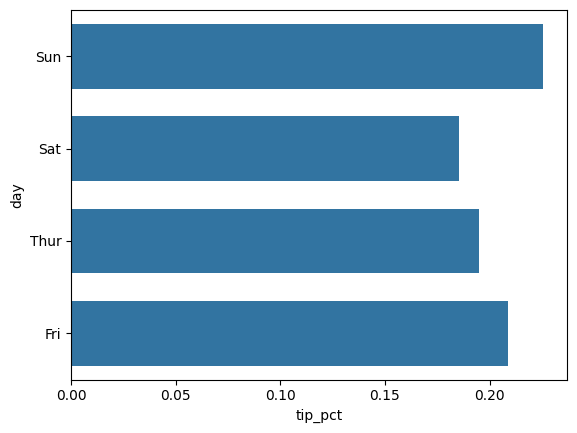

In [ ]:
#마크업 기준
#요일변 팁의 비중을 시각화(수평 막대 그래프)
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
print(tips.head())
sns.barplot(x='tip_pct', y='day', orient='h', errorbar=None, width=0.7, data=tips)# errorbar는 오차막대를 제어



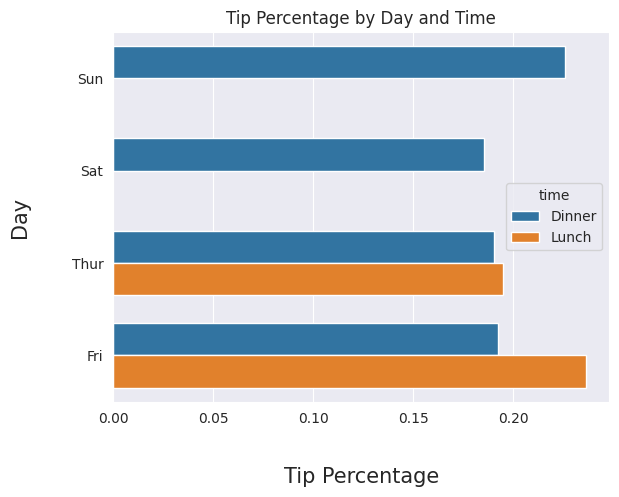

In [ ]:
sns.barplot(x='tip_pct', y='day',hue='time', orient='h', errorbar=None, width=0.7, data=tips)
sns.set_style('darkgrid')
plt.xlabel('Tip Percentage', labelpad=30, fontsize=15)
plt.ylabel('Day', labelpad=30, fontsize=15)
plt.title('Tip Percentage by Day and Time')
plt.show()

In [ ]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


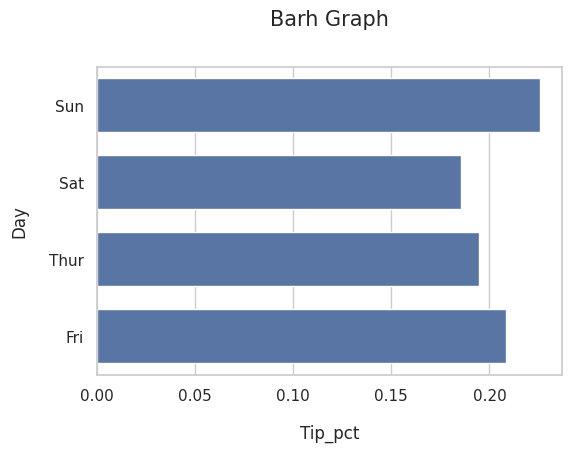

In [ ]:
# 요일별 팁의 비중을 시각화(수평 막대그래프)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.set(style='whitegrid')
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip']) # tip 비중
# print(tips.head())
sns.barplot(x='tip_pct',y='day',data=tips, orient='h', errorbar=None, width=0.7) # errorbar는 오차 막대를 제어
plt.title('Barh Graph', pad=30, fontsize=15)
plt.xlabel('Tip_pct',labelpad=15,fontsize=12)
plt.ylabel('Day',labelpad=15,fontsize=12)
plt.show()

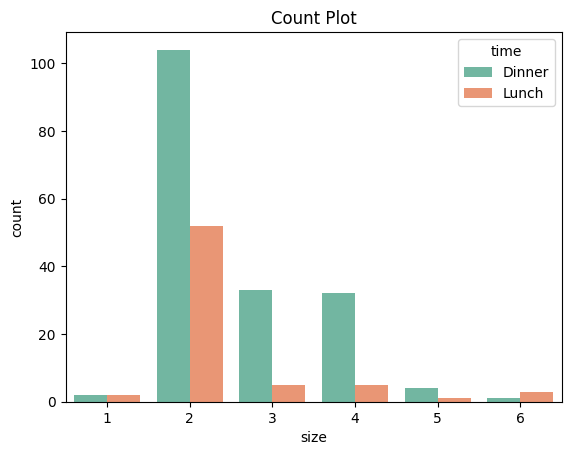

In [ ]:
#countplot
sns.countplot(x='size', data=tips, hue='time',palette='Set2')
plt.title('Count Plot')
plt.show()

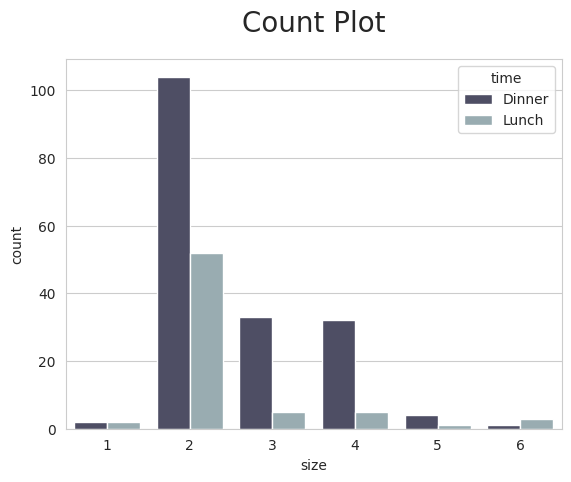

In [ ]:

sns.set_style('whitegrid')
sns.countplot(x='size', data=tips, hue='time',palette='bone')
plt.title('Count Plot', pad=20, size= 20)
plt.show()

In [ ]:
import seaborn as sns
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': 'black',
 'axes.grid': False,
 'axes.axisbelow': 'line',
 'axes.labelcolor': 'black',
 'figure.facecolor': 'white',
 'grid.color': '#b0b0b0',
 'grid.linestyle': '-',
 'text.color': 'black',
 'xtick.color': 'black',
 'ytick.color': 'black',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.projecting: 'projecting'>,
 'patch.edgecolor': 'black',
 'patch.force_edgecolor': False,
 'image.cmap': 'viridis',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['DejaVu Sans',
  'Bitstream Vera Sans',
  'Computer Modern Sans Serif',
  'Lucida Grande',
  'Verdana',
  'Geneva',
  'Lucid',
  'Arial',
  'Helvetica',
  'Avant Garde',
  'sans-serif'],
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

커널밀도추정(Kernel Density Estimation, KDE)
- kde=True는 Seaborn의 histplot 함수에서 커널 밀도 추정(Kernel Density Estimation, KDE)을 활성화하는 옵션
- 히스토그램과 함께 데이터의 분포를 부드럽게 추정한 커널 밀도 그래프가 표시
- KDE 그래프는 데이터 포인트들이 `어떻게 분포되어 있는지` 시각적으로 보여주는 부드러운 곡선을 생성

In [ ]:
comp1 = np.random.normal(0, 1, 200)
comp2 = np.random.normal(10, 2, 200)
values = pd.Series(np.concatenate([comp1, comp2]))
values.describe()

count    400.000000
mean       5.011337
std        5.221530
min       -2.872442
25%       -0.042206
50%        4.050483
75%        9.923903
max       16.535088
dtype: float64

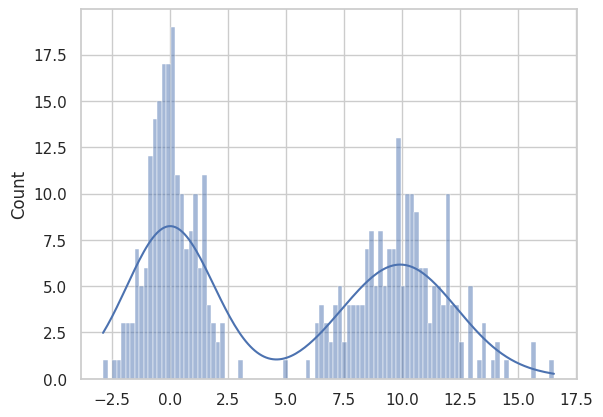

In [ ]:
sns.histplot(values, bins=100, color='b', kde=True)
plt.show()

Q. 두개의 정규분포를 따르는 상이한 데이터 셋을 생성한 후 하나의 데이터 셋으로 병합한 후 시각화하여 데이터의 분포를 확인하세요


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving fm2.csv to fm2.csv


In [ ]:
fish_multi = pd.read_csv('fm2.csv')
fish_multi.head()

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4


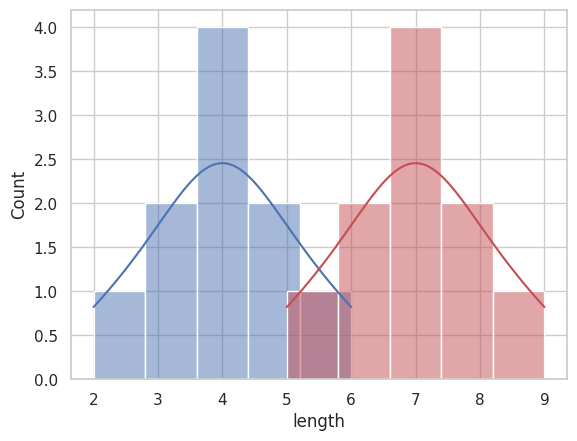

In [ ]:
length_a = fish_multi.query('species=="A"')['length']
length_b = fish_multi.query('species=="B"')['length']
sns.histplot(length_a, bins=5, color='b', kde=True)
sns.histplot(length_b, bins=5, color='r', kde=True)
plt.show()

Q.box로 비교

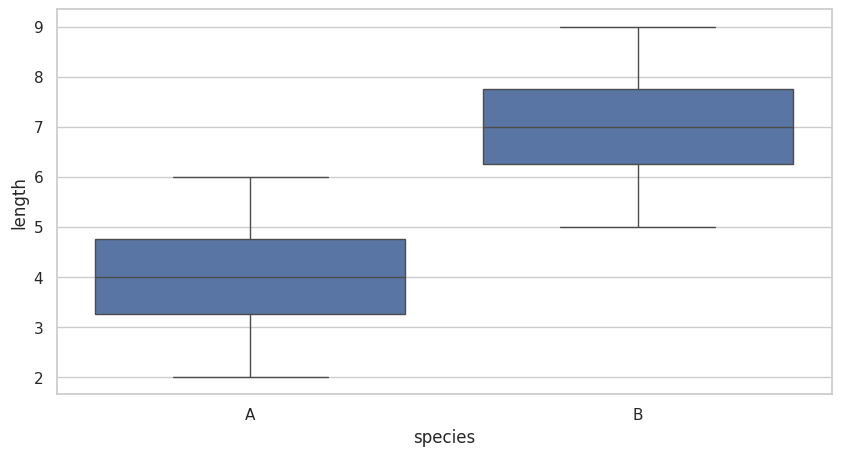

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='species', y='length', data=fish_multi)
plt.show()

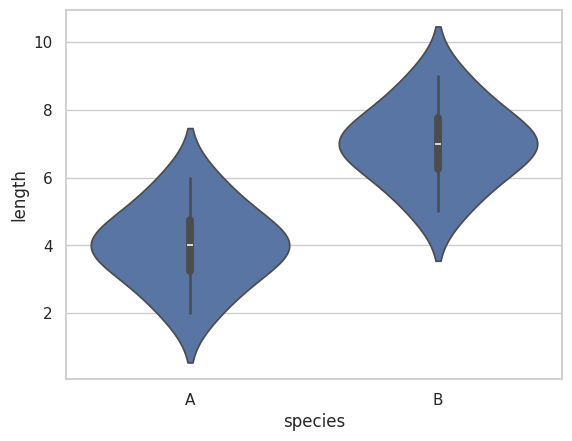

In [ ]:
#바이올린 플롯
#커널 밀도 추정의 결과를 y축 방향에 추가하여 데이터가 퍼져있는 분산의 정도 파악, 내부는 박스플롯
sns.violinplot(x='species', y='length', data=fish_multi)
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cov.csv to cov.csv


In [ ]:
cov_data = pd.read_csv('cov.csv')

In [ ]:
cov_data

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


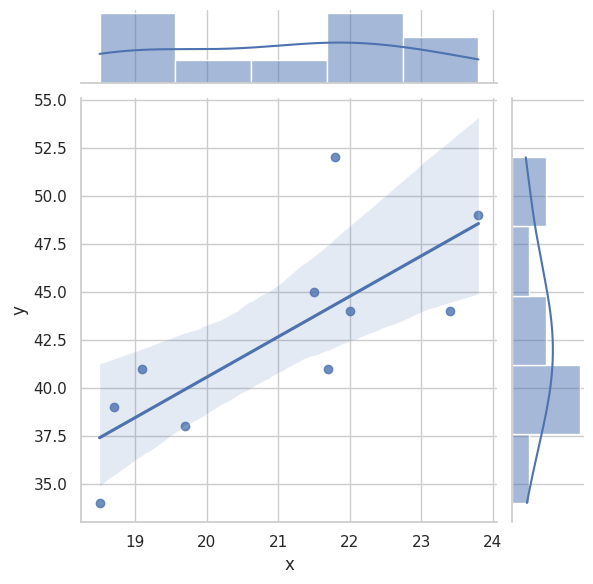

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#산점도, 추세선, 히스토그램, 오차의 범위 다 나옴
sns.jointplot(x='x', y='y', data=cov_data, kind='reg') #reg 회귀
plt.show()

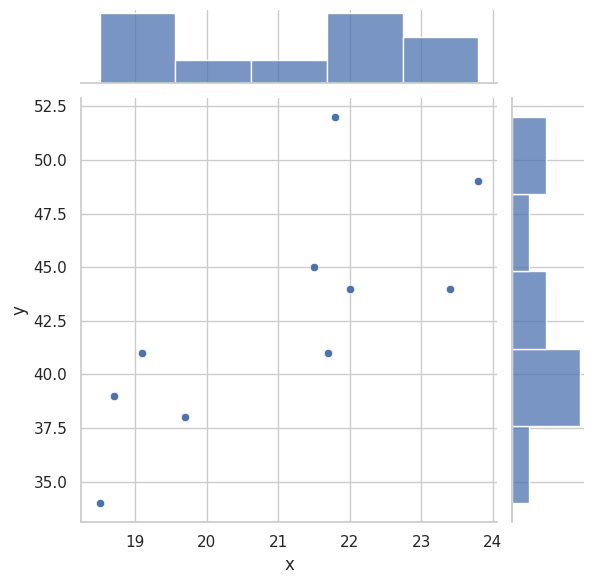

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#joinplot은 산점도, 추세선, 히스토그램, 오차의 범위 다 나옴
#변수간의 관계와 각 변수의 분포를 동시에 탐색할 수 있게 해준다.
sns.jointplot(x='x', y='y', data=cov_data) #reg 회귀 삭제시
plt.show()

sns.lmplot과 sns.regplot 차이점

기능적 차이:
- sns.lmplot: 이 함수는 FacetGrid를 사용하여 데이터를 다양한 `카테고리별로 분할`하여 여러 서브플롯을 만들 수 있다. 이는 데이터의 서브셋에 대한 회귀선을 별도로 그릴 수 있음을 의미.
- sns.regplot: 이 함수는 `단일 축 객체(ax)에 회귀선을 그리는 데 사용`. 간단하고, 한 번에 하나의 관계만 표시.

사용상의 유연성:
- sns.lmplot은 regplot보다 더 많은 매개변수를 제공하여, 데이터를 세분화하고 다양한 방식으로 표시.
- sns.regplot은 더 단순하고 직관적인 옵션을 제공하여, 빠르고 간편하게 선형 회귀선을 그릴 수 있게 한다.

그래픽 표현의 차이:
- sns.lmplot은 내부적으로 FacetGrid를 사용하므로, 플롯의 구성과 스타일을 더 세밀하게 조정할 수 있다.
- sns.regplot은 주로 간단한 선형 관계를 표시하는데 적합하며, 복잡한 그래픽 설정은 제한적.



In [ ]:
#x와 y에 대한 각각의 색깔의 선을 그림
np.random.seed(1)

data = pd.DataFrame({
    'x': np.random.rand(50),
    'y': np.random.rand(50),
    'category': np.random.choice(['A', 'B'], size=50)
})
data.head()

,x,y,category
0,0.417022,0.019367,A
1,0.720324,0.678836,A
2,0.000114,0.211628,A
3,0.302333,0.265547,A
4,0.146756,0.491573,B


In [ ]:
data.category.value_counts()

category
B    30
A    20
Name: count, dtype: int64

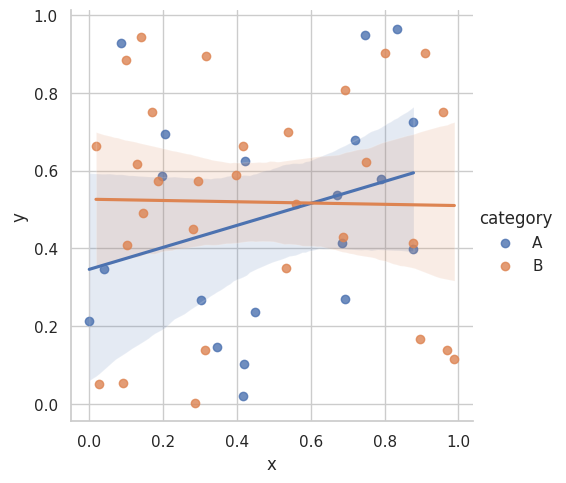

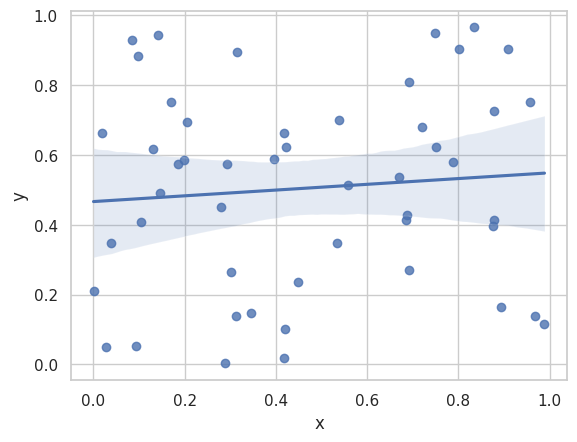

In [ ]:
#sns.lmplot
sns.lmplot(x='x', y='y', data=data, hue='category')
plt.show()

#sns.regplot
sns.regplot(x='x', y='y', data=data)
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving auto-mpg.xlsx to auto-mpg.xlsx


In [ ]:
df_auto = pd.read_excel('auto-mpg.xlsx')

<Axes: ylabel='mpg'>

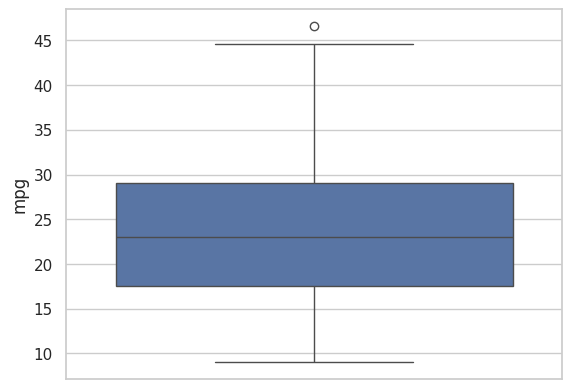

In [ ]:
sns.boxplot(data=df_auto.mpg)

<Axes: xlabel='mpg'>

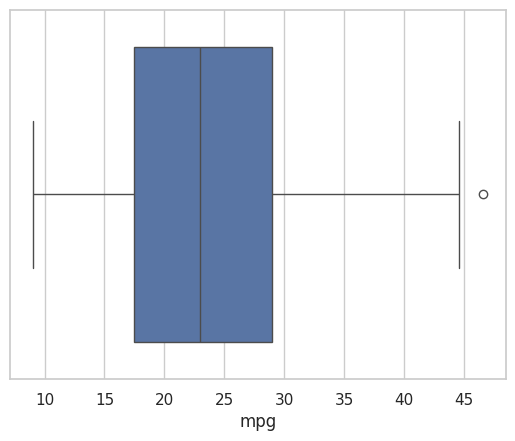

In [ ]:
sns.boxplot(data=df_auto.mpg, orient='h')

<Axes: xlabel='mpg'>

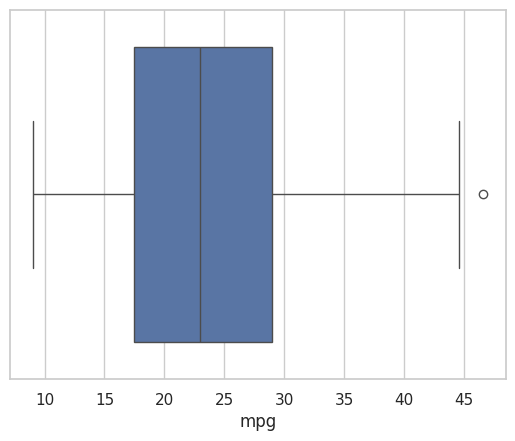

In [ ]:
sns.boxplot(data=df_auto, x='mpg')

<Axes: ylabel='mpg'>

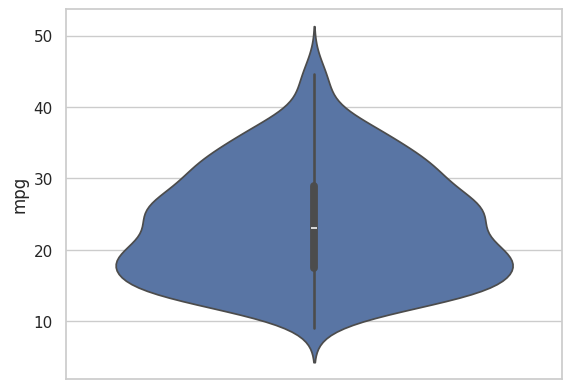

In [ ]:
sns.violinplot(data=df_auto.mpg)

<Axes: xlabel='mpg'>

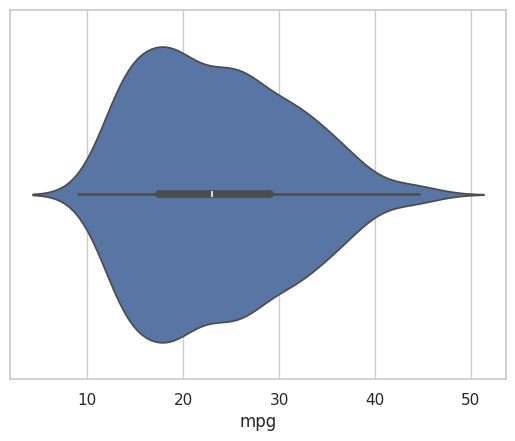

In [ ]:
sns.violinplot(data=df_auto, x='mpg')

- sns.lineplot() 함수에서는 err_style 매개변수를 이용해 밴드의 스타일을 조정할 수 있습니다.
- 예를 들어, err_style='band'로 설정하면, 투명한 밴드가 그려지고, err_style='bars'로 설정하면, 오차 막대(error bar)가 그려집니다.

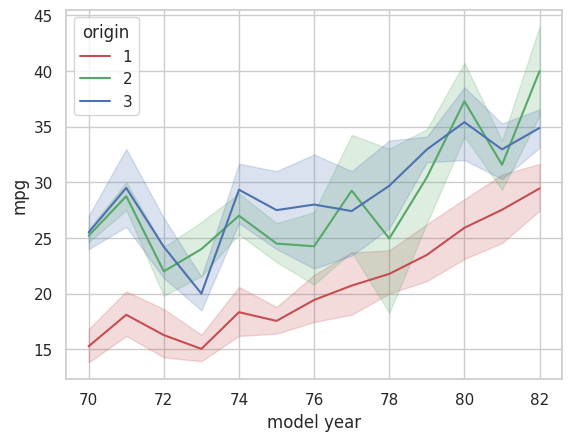

In [ ]:
#오차의 범위를 밴드형태로 보여줌
sns.lineplot(data=df_auto, x='model year', y='mpg', hue='origin', err_style='band', palette=['r','g','b'])
plt.show()

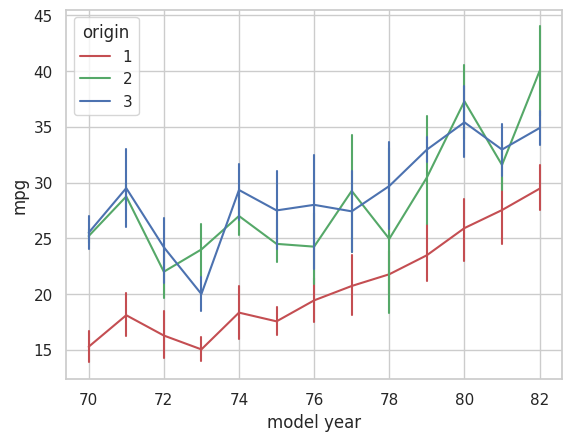

In [ ]:
sns.lineplot(data=df_auto, x='model year', y='mpg', hue='origin', err_style='bars', palette=['r','g','b'])
plt.show()

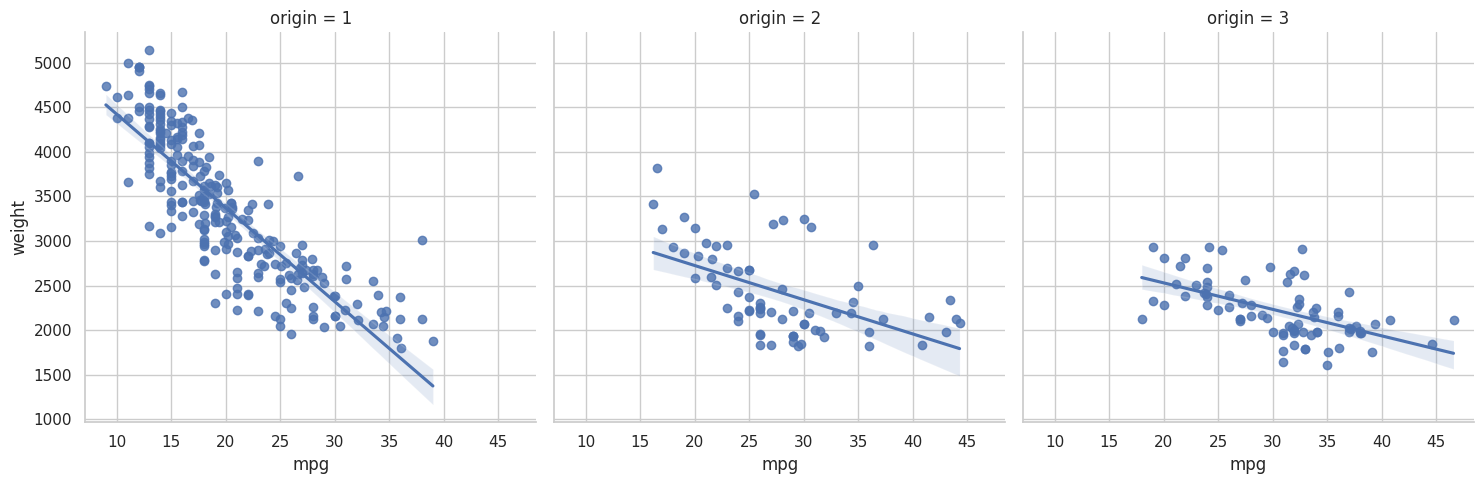

In [ ]:
#col_wrap은 한행에 최대 몇개의 그래프를 그릴수 있도록 설정
sns.lmplot(x='mpg',y='weight',data=df_auto,col='origin', col_wrap=3)

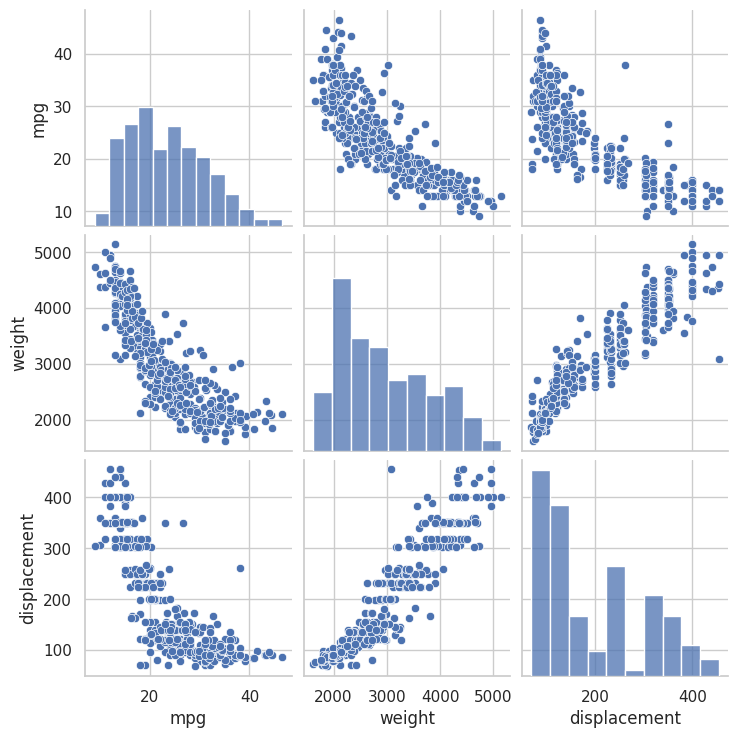

In [ ]:
sns.pairplot(df_auto[['mpg','weight','displacement']])
plt.show()

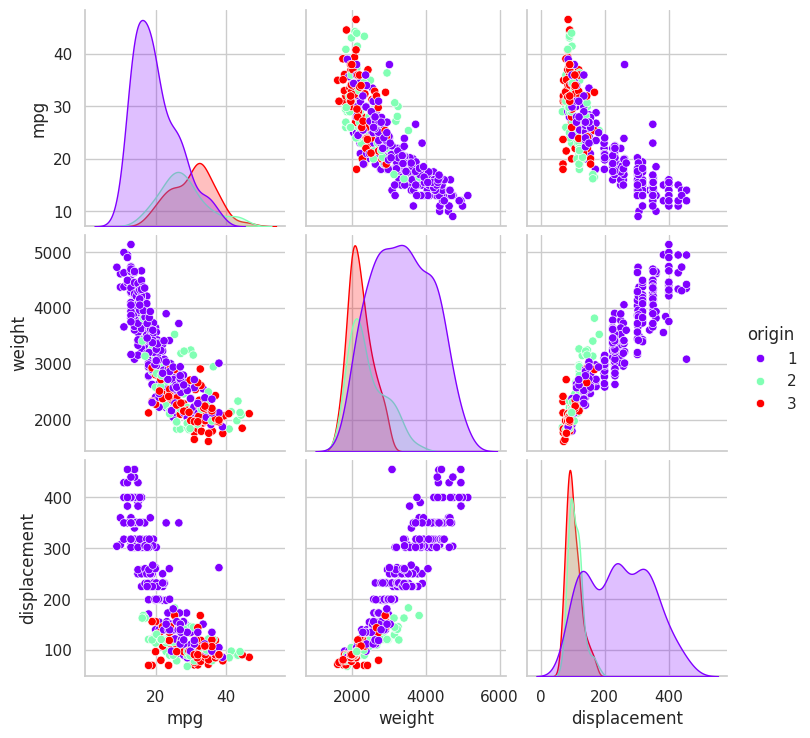

In [ ]:
sns.pairplot(df_auto[['mpg','weight','displacement','origin']], hue='origin', diag_kind='kde',palette='rainbow')
plt.show()

In [ ]:
df_pg = sns.load_dataset('penguins')
df_pg.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
t_df = sns.load_dataset('titanic')
t_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
t_df[['pclass','age','fare','survived']].corr()

,pclass,age,fare,survived
pclass,1.000000,-0.369226,-0.549500,-0.338481
age,-0.369226,1.000000,0.096067,-0.077221
fare,-0.549500,0.096067,1.000000,0.257307
survived,-0.338481,-0.077221,0.257307,1.000000


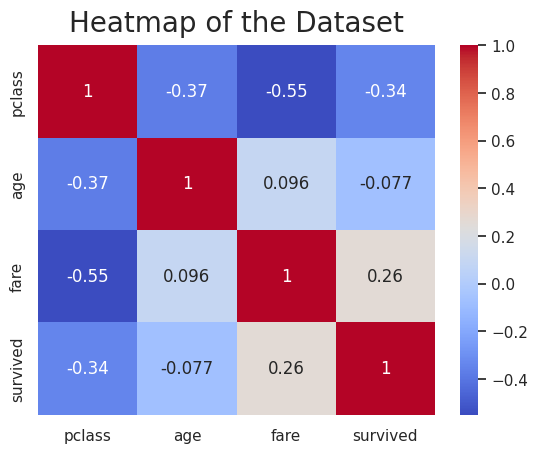

In [ ]:
sns.heatmap(t_df[['pclass','age','fare','survived']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of the Dataset',size=20, pad=10)
plt.show()#age가 미미한건 범주화 안되서